In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [199]:
new_data = pd.read_csv('new_appdata.csv')
#data preprocessing
response = new_data['enrolled']
new_data = new_data.drop(columns = 'enrolled')


In [200]:
x_train,x_test,y_train,y_test = train_test_split(new_data,response,test_size=0.25,random_state= 0)

In [201]:
new_data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CreditCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [202]:
train_identifier = x_train['user']
x_train = x_train.drop(columns = 'user')
#x_train = x_train.drop(columns = 'first_open')
test_identity = x_test['user']
x_test = x_test.drop(columns = "user")
# x_test = x_test.drop(columns = "first_open")
#the identity of the user has no effect on the model

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
sc_x = StandardScaler()

In [205]:
x_train.dtypes



dayofweek                  int64
hour                       int64
age                        int64
numscreens                 int64
minigame                   int64
used_premium_feature       int64
liked                      int64
location                   int64
Institutions               int64
VerifyPhone                int64
BankVerification           int64
VerifyDateOfBirth          int64
ProfilePage                int64
VerifyCountry              int64
Cycle                      int64
idscreen                   int64
Splash                     int64
RewardsContainer           int64
EditProfile                int64
Finances                   int64
Alerts                     int64
Leaderboard                int64
VerifyMobile               int64
VerifyHousing              int64
RewardDetail               int64
VerifyHousingAmount        int64
ProfileMaritalStatus       int64
ProfileChildren            int64
ProfileEducation           int64
ProfileEducationMajor      int64
Rewards   

In [206]:
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
x_train_numeric = x_train[numeric_columns]


In [207]:
x_train_scaled = sc_x.fit_transform(x_train_numeric)
x_train2 = pd.DataFrame(x_train_scaled, columns=numeric_columns)

In [208]:
numeric_columns2= x_test.select_dtypes(include=['int64', 'float64']).columns
x_test_numeric = x_test[numeric_columns2]
x_test_scaled = sc_x.fit_transform(x_test_numeric)
x_test2 = pd.DataFrame(x_test_scaled, columns=numeric_columns2)


In [209]:
x_train2.columns = x_train_numeric.columns.values
x_test2.columns = x_test_numeric.columns.values
x_train2.index = x_train_numeric.index.values
x_test2.index = x_test_numeric.index.values
x_train_numeric= x_train2
x_test_numeric = x_test2

Normalisation has been completed
MODEL BUILDING:

In [210]:
from sklearn.linear_model import LogisticRegression

we will use logistic regression with L1-regularisation or lasso regularisation to prevent overfitting of the data ( L1- also enables feature selection unlike ridge due to the linear factor instead of the square factor in the ridge regularisation)

In [211]:
x_train_numeric = x_train_numeric.fillna(0)  # Replace NaN values with 0
y_train = y_train.fillna(0)

In [212]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_numeric,y_train)

LogisticRegression(random_state=0)

In [213]:
x_test_numeric  = x_test_numeric.fillna(0)
y_pred = classifier.predict(x_test_numeric)

In [214]:
y_test = y_test.fillna(0)

In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # precision =tp / (tp + fp)
recall_score(y_test, y_pred) #recall =  tp / (tp + fn)
f1_score(y_test, y_pred) #f1-scpre = 2*recall*precision/(precision+recall)

np.float64(0.7651179644093727)

In [216]:
print(precision_score(y_test, y_pred))

0.7630902666238355


Test Data Accuracy: 0.7666


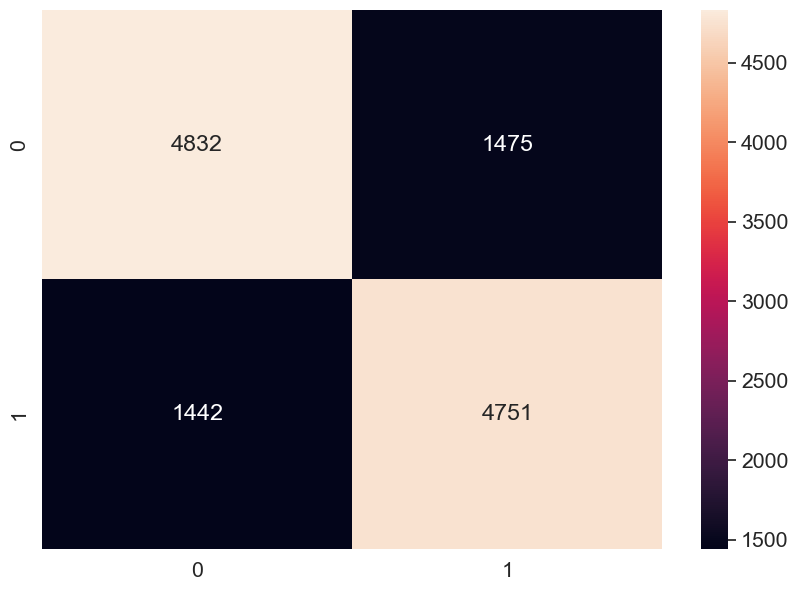

In [217]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

VALIDATING OUR RESULTS USING K-FOLD CROSS VALIDATION

In [218]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train_numeric, y = y_train, cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.764 (+/- 0.009)


In [219]:
#format the final results obtained
final_results = pd.concat([y_test, test_identity],axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user','enrolled','predicted_reach']].reset_index(drop=  True)
print(final_results)

         user  enrolled  predicted_reach
0      239786         1                1
1      279644         1                1
2       98290         0                0
3      170150         1                1
4      237568         1                1
...       ...       ...              ...
12495  105993         0                1
12496  288268         1                1
12497   12780         1                1
12498  299091         1                0
12499  249945         0                0

[12500 rows x 3 columns]


Hence, using this model we can target our marketing towards only those users who are unlikely to subscribe to paid features, and we can also run this model on daily updated data to ensure whether the accuracy is maintained or not.